In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering, DBSCAN
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Preprocessing

In [3]:
mnist = pd.concat([pd.read_csv('mnist_train.csv', header=None), pd.read_csv('mnist_test.csv', header=None)], axis=1)

In [18]:
X = np.array(mnist.iloc[::50, 1:785])
X_std = StandardScaler().fit_transform(X.astype('float64'))
labels = np.array(mnist.iloc[::50, 0])
print(X.shape)
print(labels.shape)

(1200, 784)
(1200,)


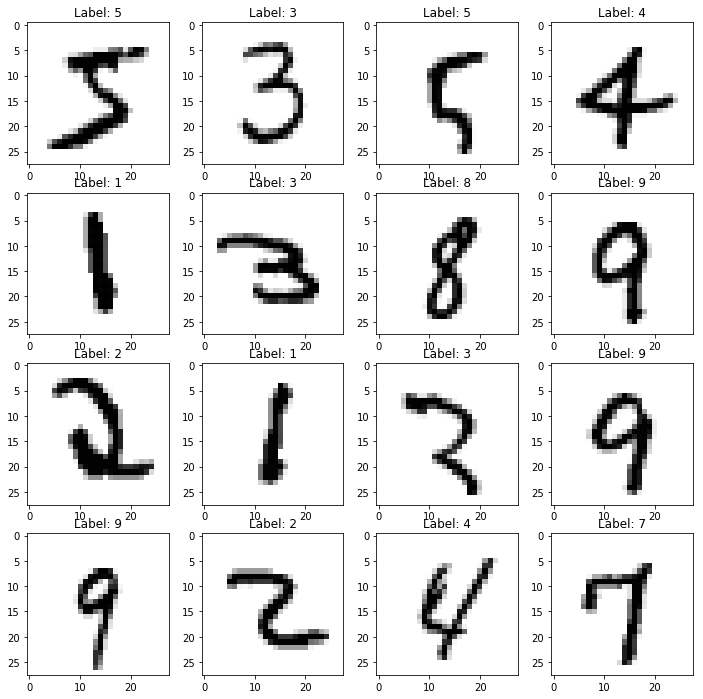

In [19]:
plt.figure(figsize=(12, 12))
for i in np.arange(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(np.reshape(X[i], (28, 28)), cmap='binary')
    plt.title('Label: {}'.format(labels[i]))
plt.show()

In [20]:
print(pd.value_counts(labels))

7    149
3    130
1    125
9    118
4    118
8    117
6    117
2    115
5    111
0    100
dtype: int64


# Clustering
## Hierarchical clustering
[Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

In [21]:
# Using ward linkage function (minimize the variance of a set)
hierarchical_ward = AgglomerativeClustering(n_clusters=10,
                                            affinity='euclidean',
                                            linkage='ward')
clus_hierarchical_ward = hierarchical_ward.fit_predict(X)
centers_hierarchical_ward = np.array([np.apply_along_axis(np.mean, 0, X[clus_hierarchical_ward == i])
                                     for i in np.arange(10)])
print(pd.value_counts(clus_hierarchical_ward))

# Using complete linkage (maximum distance between two sets)
hierarchical_complete = AgglomerativeClustering(n_clusters=10,
                                              affinity='euclidean',
                                              linkage='complete')
clus_hierarchical_complete = hierarchical_complete.fit_predict(X)
centers_hierarchical_complete = np.array([np.apply_along_axis(np.mean, 0, X[clus_hierarchical_complete == i])
                                          for i in np.arange(10)])
print(pd.value_counts(clus_hierarchical_complete))

2    243
5    173
1    153
0    126
9    116
6    107
3     84
4     83
8     66
7     49
dtype: int64
2    438
6    431
9     81
3     58
1     53
5     45
4     42
0     38
8     12
7      2
dtype: int64


## K-means
[k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

In [22]:
kmeans = KMeans(n_clusters=10,
                init='k-means++',
                n_init=20)
clus_kmeans = kmeans.fit_predict(X)
centers_kmeans = kmeans.cluster_centers_
print(pd.value_counts(clus_kmeans))

1    172
7    171
2    159
6    138
8    134
0    113
5     80
3     80
9     78
4     75
dtype: int64


## Kernel K-means
[Spectral clustering](https://en.wikipedia.org/wiki/Spectral_clustering)

In [23]:
kernel_kmeans = SpectralClustering(n_clusters=10,
                                   n_init=50,
                                   affinity='nearest_neighbors',
                                   assign_labels='kmeans')
clus_kernel_kmeans = kernel_kmeans.fit_predict(X)
centers_kernel_kmeans = np.array([np.apply_along_axis(np.mean, 0, X[clus_kernel_kmeans == i])
                                   for i in np.arange(10)])
print(pd.value_counts(clus_kernel_kmeans))

0    292
8    195
5    177
4     84
7     81
6     80
2     80
1     79
9     75
3     57
dtype: int64


## DBSCAN
[density-based spatial clustering of applications with noise](https://fr.wikipedia.org/wiki/DBSCAN)

In [24]:
dbscan = DBSCAN(eps=2200, min_samples=10)
clus_dbscan = dbscan.fit_predict(X)
pd.value_counts(clus_dbscan)

 0    1190
-1      10
dtype: int64

After several tries on different parameters eps and min_samples, DBSAN clustering is not satisfactory. This algorithm is difficult to use with a large number of features. 

In [25]:
clusters = {'hierarchical_ward': clus_hierarchical_ward,
            'hierarchical_complete': clus_hierarchical_complete,
            'kmeans': clus_kmeans,
            'kernel_kmeans': clus_kernel_kmeans}
centers = {'hierarchical_ward': clus_hierarchical_ward,
           'hierarchical_complete': clus_hierarchical_complete,
           'kmeans': centers_kmeans,
           'kernel_kmeans': centers_kernel_kmeans}
print(clusters)

{'hierarchical_ward': array([5, 5, 2, ..., 2, 2, 9], dtype=int64), 'hierarchical_complete': array([2, 2, 6, ..., 3, 2, 2], dtype=int64), 'kmeans': array([2, 2, 2, ..., 2, 7, 7]), 'kernel_kmeans': array([0, 0, 8, ..., 2, 8, 8])}


# Visualisation

In [26]:
def plot_function(x1, x2, labels, clusters):
    plt.figure(figsize=(22, 16))
    
    for i, clus_name in enumerate(clusters):
    
        plt.subplot(2, 2, i + 1)
        plt.scatter(x1, x2, c=plt.cm.Set2(clusters[clus_name]/10), s=1)
        
        for obs in np.arange(len(x1)):
            plt.text(x1[obs], x2[obs],
                     str(labels[obs]),
                     color=plt.cm.tab20(clusters[clus_name][obs]/10))
            
        for i in np.arange(10):
            # Show digit labels centers
            plt.text(x=x1[labels == i].mean(),
                     y=x2[labels == i].mean(),
                     s=str(i),
                     fontsize=25)
            # Show clusters centers
            plt.scatter(x=x1[clusters[clus_name] == i].mean(),
                        y=x2[clusters[clus_name] == i].mean(),
                        s=800,
                        marker='P',
                        color=plt.cm.tab20(i/10))
            
        plt.title('Type of clustering: {}'.format(clus_name))
        plt.xlabel('First dimension')
        plt.ylabel('Second dimension')
        
    plt.show()

## PCA
[Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)

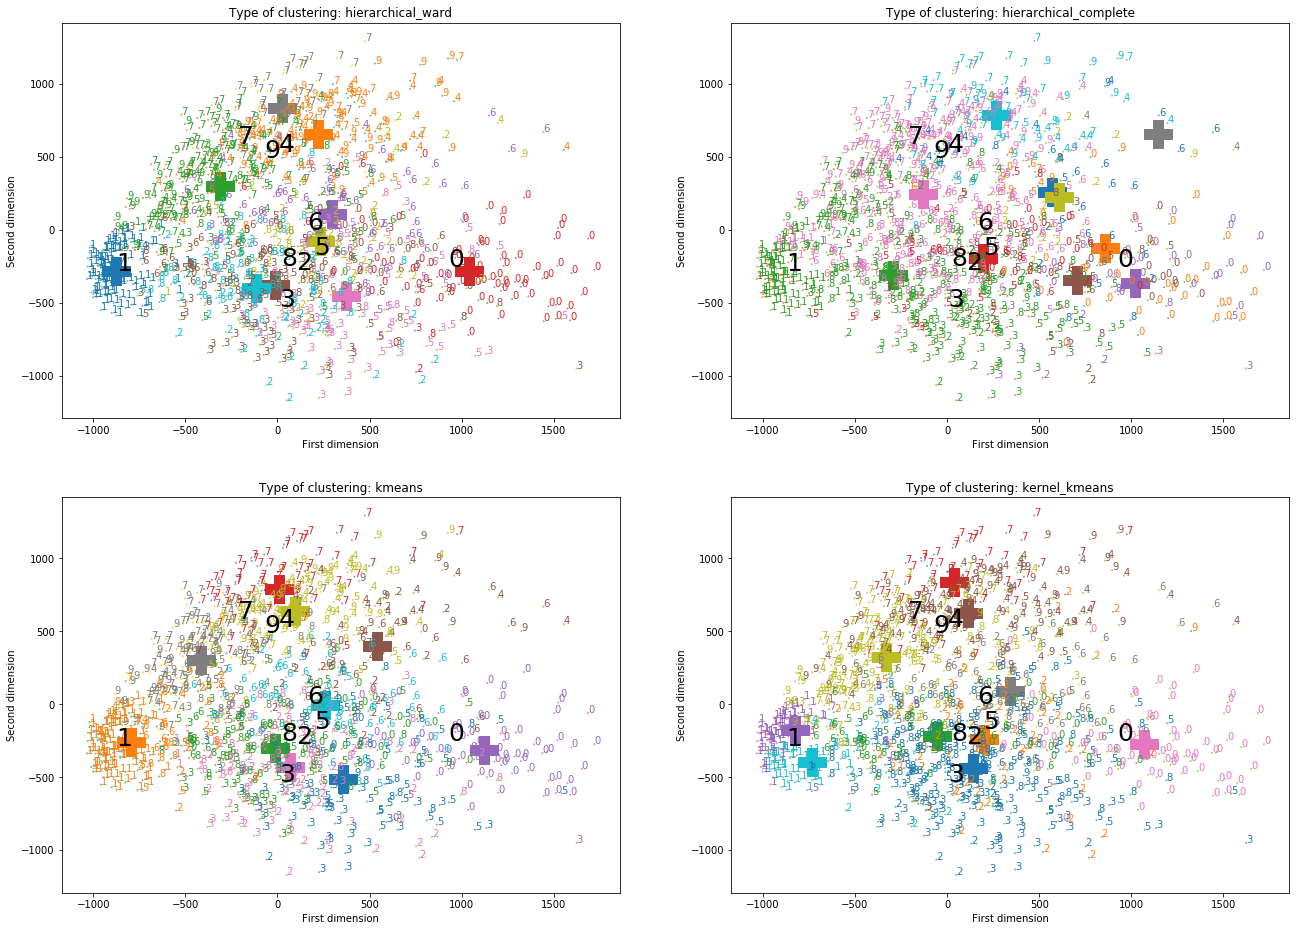

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
x1 = X_pca[:, 0]
x2 = X_pca[:, 1]
plot_function(x1, x2, labels, clusters)

## kPCA
[Kernel principal component analysis](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis)

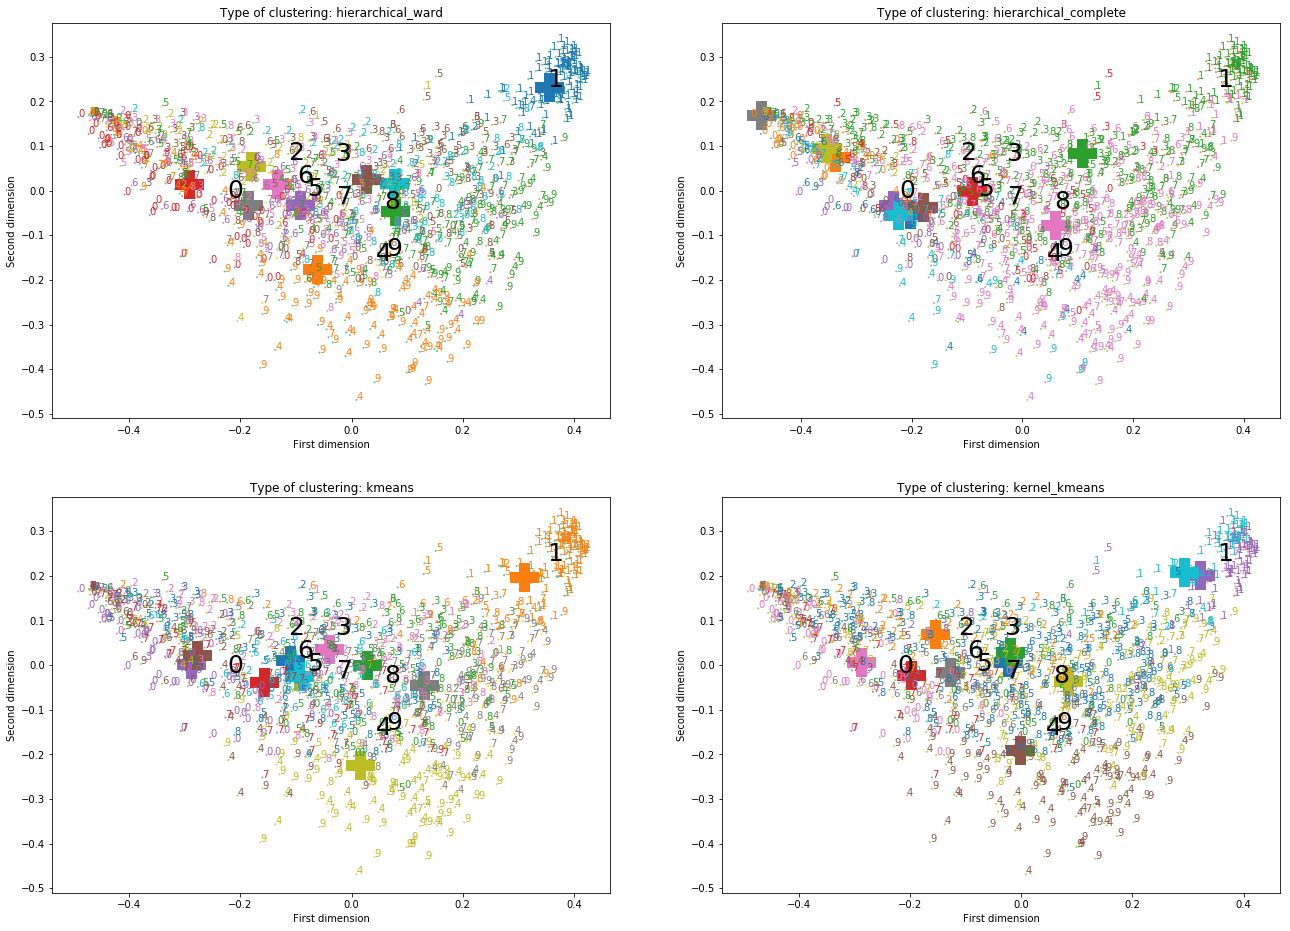

In [28]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)
x1 = X_kpca[:, 0]
x2 = X_kpca[:, 1]
plot_function(x1, x2, labels, clusters)

## MDS
[Multidimensional scaling](https://en.wikipedia.org/wiki/Multidimensional_scaling)

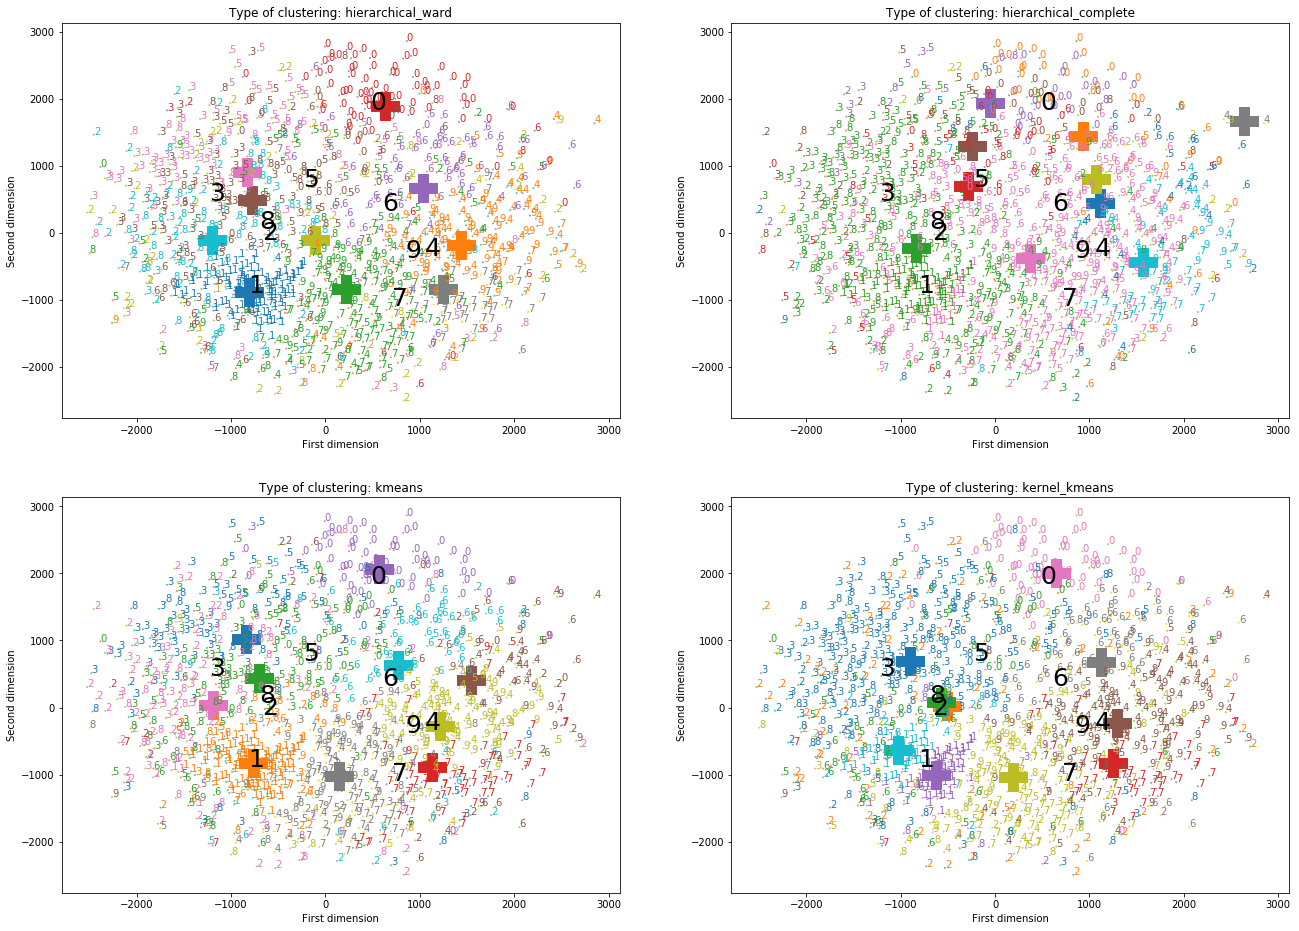

In [43]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)
x1 = X_mds[:, 0]
x2 = X_mds[:, 1]
plot_function(x1, x2, labels, clusters)

## Isomap
[Isomap](https://en.wikipedia.org/wiki/Isomap)

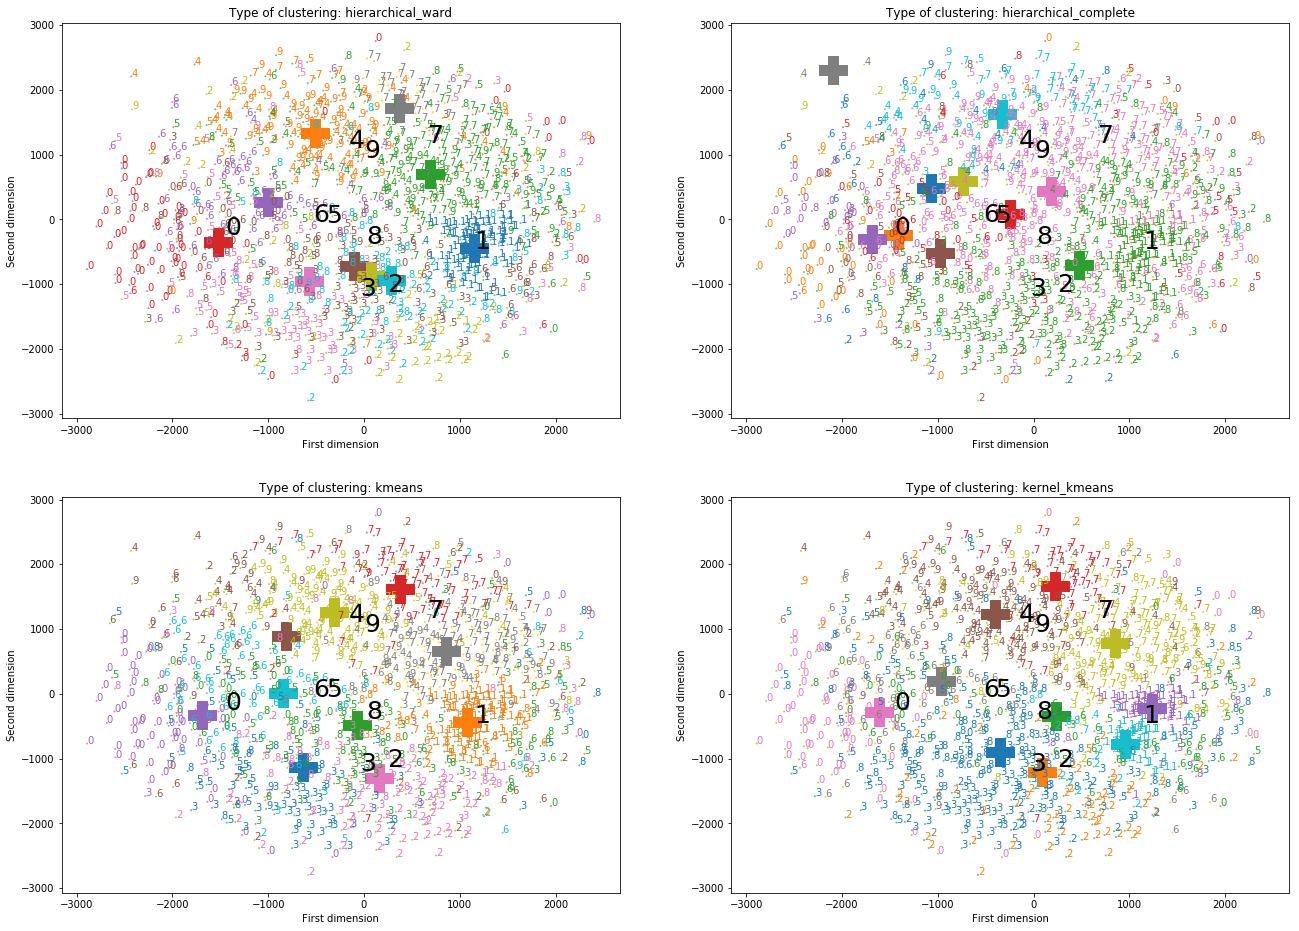

In [41]:
isomap = Isomap(n_components=2)
X_isomap = mds.fit_transform(X)
x1 = X_isomap[:, 0]
x2 = X_isomap[:, 1]
plot_function(x1, x2, labels, clusters)

## LLE
[Locally-linear embedding](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Locally-linear_embedding)

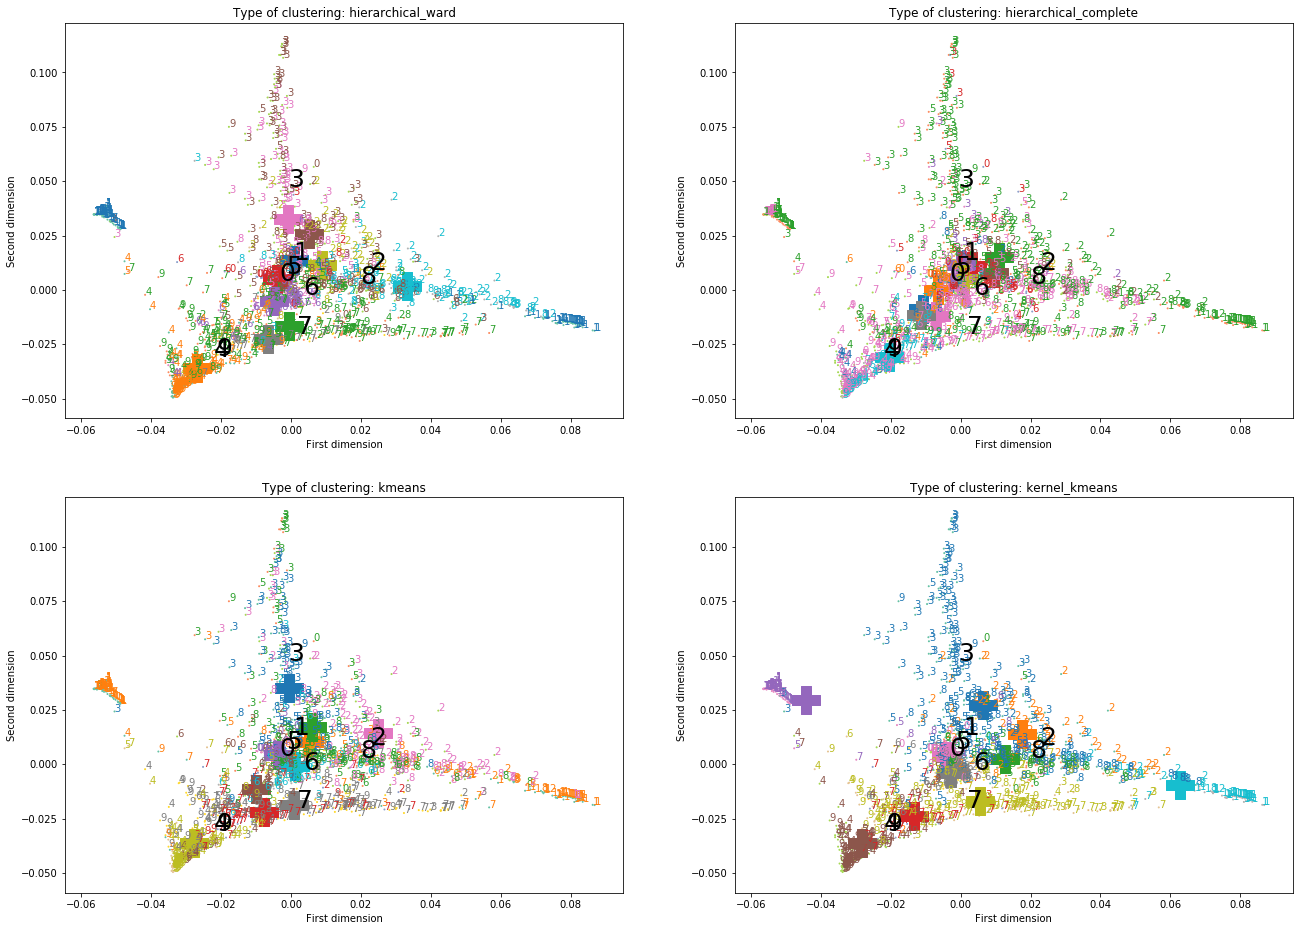

In [39]:
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_std)
x1 = X_lle[:, 0]
x2 = X_lle[:, 1]
plot_function(x1, x2, labels, clusters)

## t-SNE
[t-distributed stochastic neighbor embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

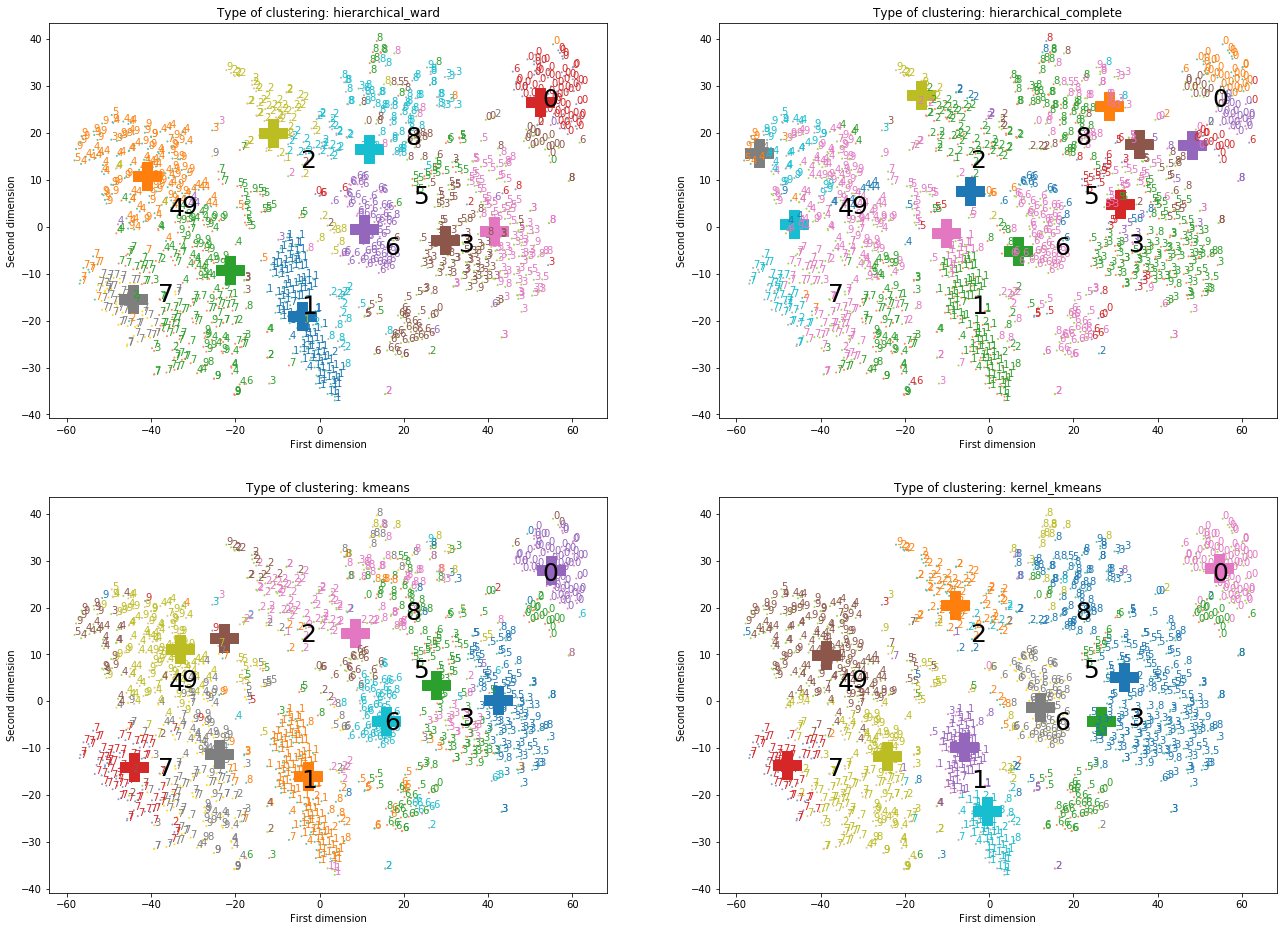

In [37]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]
plot_function(x1, x2, labels, clusters)

# Performance
## Silhouette scores
[Silhouette (clustering)](https://en.wikipedia.org/wiki/Silhouette_(clustering))

In [33]:
silhouette = {clus_name: round(silhouette_score(X, clusters[clus_name]), 4) for clus_name in clusters}
print(silhouette)
# Larger score implies better clustering

{'hierarchical_ward': 0.0428, 'hierarchical_complete': 0.0289, 'kmeans': 0.0614, 'kernel_kmeans': 0.0394}


## Adjusted Rand Score
[Rand index](https://en.wikipedia.org/wiki/Rand_index)

In [34]:
rand = {clus_name: round(adjusted_rand_score(labels, clusters[clus_name]), 4) for clus_name in clusters}
print(rand)

{'hierarchical_ward': 0.3701, 'hierarchical_complete': 0.1017, 'kmeans': 0.3301, 'kernel_kmeans': 0.3875}


In [35]:
contingency = {clus_name: cluster.contingency_matrix(labels, clusters[clus_name]) for clus_name in clusters}
kmean_contingency = contingency['kmeans']
print(kmean_contingency)

[[  2   0  22   0  73   3   0   0   0   0]
 [  0 120   0   0   0   0   5   0   0   0]
 [  1   9   1   2   0  20  73   5   0   4]
 [ 53   5  38   0   1   1  23   5   1   3]
 [  0   4   0   0   0  20   0  35  58   1]
 [ 35   4  46   1   1   1   0   9  11   3]
 [  1   8  20   0   0  21   0   3   0  64]
 [  0   7   0  74   0   1   0  61   6   0]
 [ 18  12  31   0   0   0  37  13   4   2]
 [  3   3   1   3   0  13   0  40  54   1]]
